# RICE PLANT DISEASE RECOGNITION


### Importing Required Libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

### Loading Image datasets from folders:

In [3]:
train_data_path = 'Rice leaf disease/Training data'
test_data_path = 'Rice leaf disease/Testing data'
val_data_path = 'Rice leaf disease/Validation data'

In [4]:
img_width = 180
img_height =180 

### Preprocessing the training dataset:

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    train_data_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 1322 files belonging to 8 classes.


In [6]:
#Data Categories:
data_cat = data_train.class_names

In [7]:
data_cat

['Bacterial Leaf Blight',
 'Brown Spot',
 'Healthy Rice Leaf',
 'Leaf Blast',
 'Leaf scald',
 'Narrow Brown Leaf Spot',
 'Rice Hispa',
 'Sheath Blight']

### Preprocessing the Validation dataset:

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(val_data_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 186 files belonging to 8 classes.


### Preprocessing the testing dataset:

In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
test_data_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 378 files belonging to 8 classes.


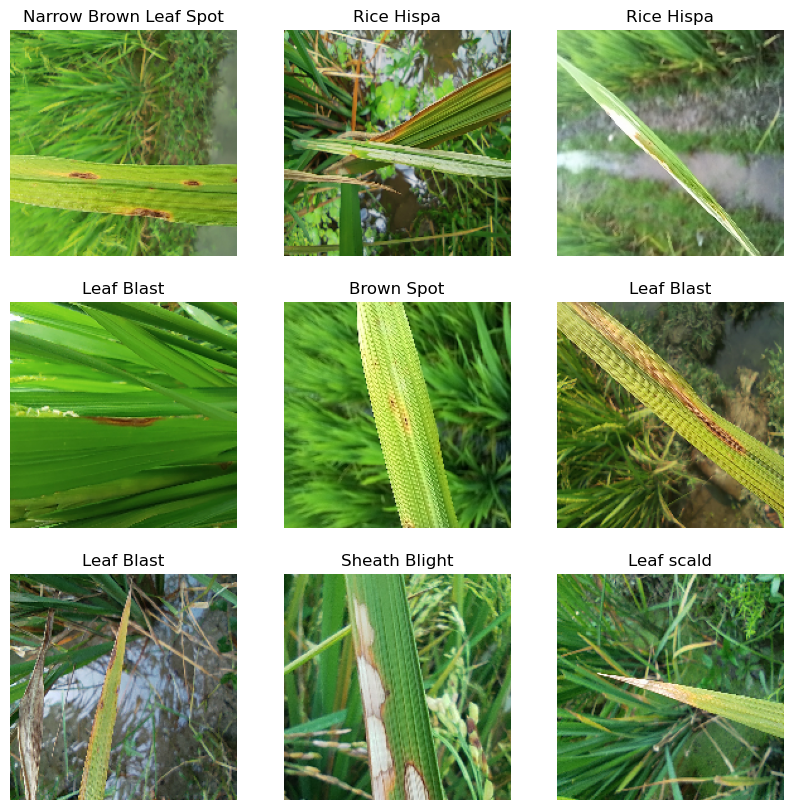

In [10]:
#Displaying the rice plant images and their corresponding disease condition:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

### Building Model:

In [ ]:
#Importing Tensorflow librarity

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

### Compiling Model:

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [15]:
epochs_size = 10
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.1589 - loss: 2.7571 - val_accuracy: 0.2796 - val_loss: 1.9103
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.4125 - loss: 1.6529 - val_accuracy: 0.4194 - val_loss: 1.5647
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.5691 - loss: 1.2503 - val_accuracy: 0.4785 - val_loss: 1.4076
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.6827 - loss: 0.9571 - val_accuracy: 0.5000 - val_loss: 1.5006
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.7449 - loss: 0.7757 - val_accuracy: 0.5484 - val_loss: 1.4877
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.8461 - loss: 0.5162 - val_accuracy: 0.5215 - val_loss: 1.6408
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.8986 - loss: 0.3521 - val_accuracy: 0.5108 - val_loss: 1.9915
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.9368 - loss: 0.2239 - val_accuracy: 0.5000 - val_loss:

### Accuracy and Loss Visualization:

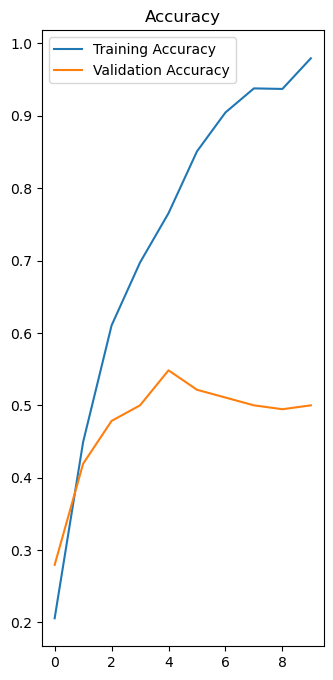

In [18]:
#Accuracy
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')
plt.legend()


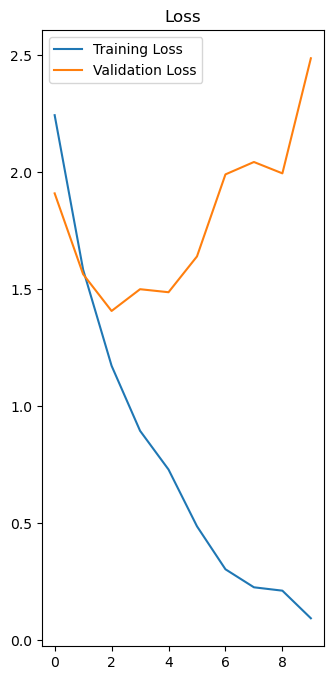

In [19]:
#Loss
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')
plt.legend()

### Random Prediction:

In [16]:
image = 'Brown_spot (9).jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [17]:
predict = model.predict(img_bat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


In [18]:
score = tf.nn.softmax(predict)

In [19]:
print('Image showing {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Image showing Brown Spot with accuracy of 99.71


In [20]:
# saving the model
model.save('riceplant_model.keras')